In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [6]:
for mess_no, message in enumerate(messages[:10]):
        print(mess_no, message)
        print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
messages[0]
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep= '\t', names=['label', 'message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length']= messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

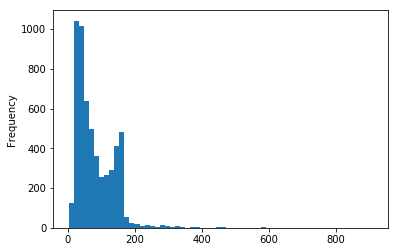

In [15]:
messages['length'].plot.hist(bins=60)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [34]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25b5df588>,
      dtype=object)

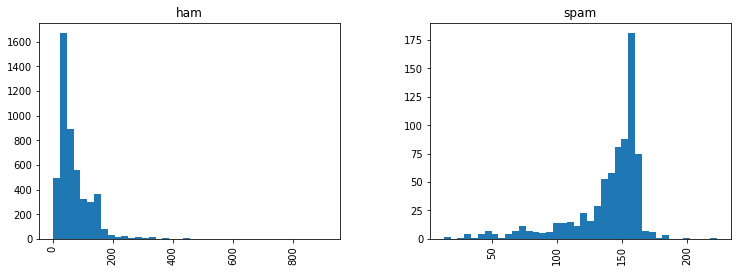

In [18]:
messages.hist(column='length', by='label', bins=40, figsize=(12,4))

In [19]:
import string
from nltk.corpus import stopwords

In [20]:
def text_mess(mess):
    no_punc= [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#tokenizing
messages['message'].head(5).apply(text_mess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer= text_mess).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11425


In [39]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [40]:
bow4 = bow_transformer.transform([mess4])

In [41]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [48]:
bow_transformer.get_feature_names()[9554]

'say'

In [49]:
messages_bow = bow_transformer.transform(messages['message'])

In [51]:
print('Shape of Sparse matrix is', messages_bow.shape)

Shape of Sparse matrix is (5572, 11425)


In [53]:
#non zero values in the matrix
messages_bow.nnz

50548

In [57]:
#checking sparsity
sparsity = (100* messages_bow.nnz/ (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity : ', sparsity)

Sparsity :  0.07940295412668218


In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [60]:
#testing
tfidf4 = tfidf_transformer.transform(bow4)

In [62]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [64]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['U']]

3.966206571809915

In [65]:
#converting entire corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [69]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [70]:
messages['label'][3]

'ham'

In [71]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [72]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.33)

In [77]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer= text_mess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


In [78]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_mess at 0x7fb25b5ecbf8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
predictions= pipeline.predict(msg_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1578
        spam       1.00      0.73      0.84       261

   micro avg       0.96      0.96      0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839

